In [1]:
# Import measure related functions
from spiketools.measures.spikes import (compute_firing_rate, compute_isis,
                                        compute_cv, compute_fano_factor)
from spiketools.measures.conversions import (convert_times_to_train, convert_train_to_times,
                                             convert_isis_to_times)
from spiketools.measures.trials import (compute_trial_frs, compute_pre_post_rates,
                                        compute_segment_frs, compute_pre_post_averages,
                                        compute_pre_post_diffs)

from spiketools.plts.data import plot_lines
# Import simulation functions
from spiketools.sim import sim_spiketimes

# Import plot functions
from spiketools.plts.spikes import plot_isis
from spiketools.plts.trials import plot_rasters
from fooof.plts import plot_spectra

import mne
import numpy as np
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from spiketools.plts.utils import make_axes

import warnings
warnings.filterwarnings("ignore")



In [5]:
# folder of the results
path_files = Path('/home/b1044271/Columbia/Results/PSDs/Cz/')

# Get names of all subject folder
sbj_folders = list(path_files.iterdir())
sbj_folders = sorted(sbj_folders)

In [144]:
# a function to generate freq files
def files(path):
    for file in os.listdir(path):
        if os.path.isfile(os.path.join(path, file)):
            yield file

In [146]:
# get frequencies for all dimensions (x axis).
path_freqs = Path('/home/b1044271/Columbia/Results/PSDs/Freqs')
f_files = list(path_freqs.iterdir())
f_files = sorted(f_files)

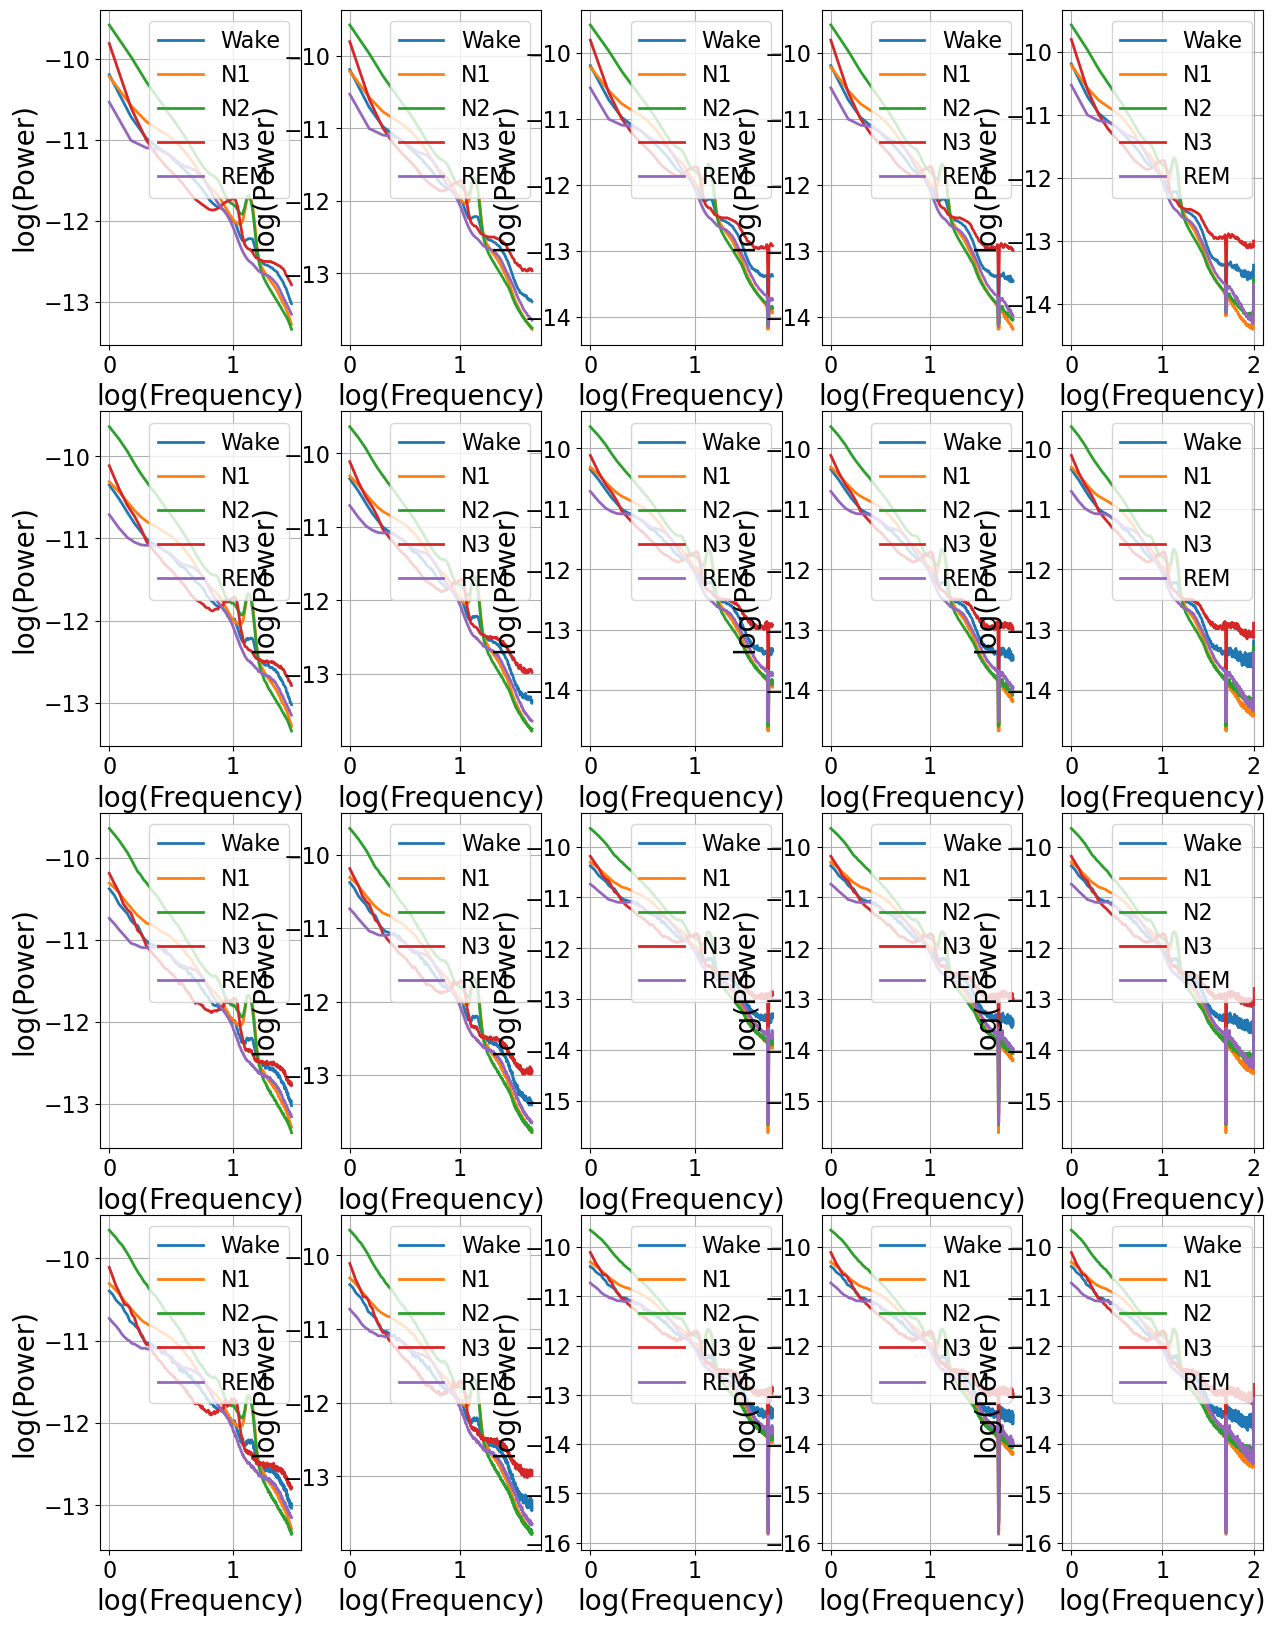

In [173]:
N1_psd={}
N2_psd={}
N3_psd={}
AW_psd={}
RM_psd={}

F_PARAMS = ['F30', 'F45', 'F55', 'F70', 'F100']
T_PARAMS = ['T2', 'T5', 'T10', 'T15']
axes = iter(make_axes(20, 5, figsize=(15, 20)))

for CUR_T_PARAM in T_PARAMS:
    for CUR_F_PARAM in F_PARAMS:
        i = 0
        freqs_d = np.load((path_freqs/(CUR_T_PARAM + CUR_F_PARAM + '_freqres.npy')))
        for subj in sbj_folders:  
            N1_psd[i] = np.mean(np.load(path_files / subj / 'N1' / (CUR_T_PARAM + '_' + CUR_F_PARAM + '.npy')),0)
            N2_psd[i] = np.mean(np.load(path_files / subj /'N2' / (CUR_T_PARAM + '_' + CUR_F_PARAM + '.npy')),0)
            N3_psd[i] = np.mean(np.load(path_files / subj /'N3' / (CUR_T_PARAM + '_' + CUR_F_PARAM + '.npy')),0)
            AW_psd[i] = np.mean(np.load(path_files / subj /'AW' / (CUR_T_PARAM + '_' + CUR_F_PARAM + '.npy')),0)
            RM_psd[i] = np.mean(np.load(path_files / subj /'RM' / (CUR_T_PARAM + '_' + CUR_F_PARAM + '.npy')),0)
            i = i+1
          
        # mean over all subjects per condition
        lN1 = list(iter(N1_psd.values())) #convert values to list
        lN2 = list(iter(N2_psd.values())) #convert values to list
        lN3 = list(iter(N3_psd.values())) #convert values to list
        lAW = list(iter(AW_psd.values())) #convert values to list
        lRM = list(iter(RM_psd.values())) #convert values to list

        dN1 = {}
        dN2 = {}
        dN3 = {}
        dAW = {}
        dRM = {}

        for ii in range(len(lN1[0])): 
           row_list = [row[ii] for row in lN1]                 #get values column-wise
           dN1[ii] = sum(row_list)/len(row_list)   

           row_list = [row[ii] for row in lN2]                 #get values column-wise
           dN2[ii] = sum(row_list)/len(row_list)

           row_list = [row[ii] for row in lN3]                 #get values column-wise
           dN3[ii] = sum(row_list)/len(row_list)

           row_list = [row[ii] for row in lAW]                 #get values column-wise
           dAW[ii] = sum(row_list)/len(row_list)

           row_list = [row[ii] for row in lRM]                 #get values column-wise
           dRM[ii] = sum(row_list)/len(row_list)

        plot_spectra(freqs_d,[list(dN1.values()),list(dN2.values()),list(dN3.values()),
        list(dAW.values()),list(dRM.values())], log_freqs=True, log_powers=True, ax=next(axes),labels=['Wake','N1','N2','N3','REM'])
        
plt.savefig("Group_PSDs.svg", dpi = 500 )


In [107]:
i = 0
CUR_F_PARAM = 'F30'
CUR_T_PARAM = 'T2'

for subj in sbj_folders:  
    N1_psd[i] = np.mean(np.load(path_files / subj /'N1' / (CUR_T_PARAM + '_' + CUR_F_PARAM + '.npy')),0)
    N2_psd[i] = np.mean(np.load(path_files / subj /'N2' / (CUR_T_PARAM + '_' + CUR_F_PARAM + '.npy')),0)
    N3_psd[i] = np.mean(np.load(path_files / subj /'N3' / (CUR_T_PARAM + '_' + CUR_F_PARAM + '.npy')),0)
    AW_psd[i] = np.mean(np.load(path_files / subj /'AW' / (CUR_T_PARAM + '_' + CUR_F_PARAM + '.npy')),0)
    RM_psd[i] = np.mean(np.load(path_files / subj /'RM' / (CUR_T_PARAM + '_' + CUR_F_PARAM + '.npy')),0)
    i = i+1

lN1 = list(iter(N1_psd.values())) #convert values to list
lN2 = list(iter(N2_psd.values())) #convert values to list
lN3 = list(iter(N3_psd.values())) #convert values to list
lAW = list(iter(AW_psd.values())) #convert values to list
lRM = list(iter(RM_psd.values())) #convert values to list

dN1 = {}
dN2 = {}
dN3 = {}
dAW = {}
dRM = {}

for ii in range(len(lN1[0])): 
   row_list = [row[ii] for row in lN1]                 #get values column-wise
   dN1[ii] = sum(row_list)/len(row_list)   
    
   row_list = [row[ii] for row in lN2]                 #get values column-wise
   dN2[ii] = sum(row_list)/len(row_list)
    
   row_list = [row[ii] for row in lN3]                 #get values column-wise
   dN3[ii] = sum(row_list)/len(row_list)
    
   row_list = [row[ii] for row in lAW]                 #get values column-wise
   dAW[ii] = sum(row_list)/len(row_list)
    
   row_list = [row[ii] for row in lRM]                 #get values column-wise
   dRM[ii] = sum(row_list)/len(row_list)

plot_spectra(np.arange(0, len(dN1)),[list(dN1.values()),list(dN2.values()),list(dN3.values()),
list(dAW.values()),list(dRM.values())], log_freqs=True, log_powers=True, labels=['Wake','N1','N2','N3','REM'])

In [112]:
list(dN1.values())

[6.421005259886318e-11,
 1.9446464398137618e-11,
 1.0527389728835507e-11,
 8.010354670854165e-12,
 6.70730873139097e-12,
 5.348934362566262e-12,
 4.422051925667662e-12,
 3.72039849678478e-12,
 3.095602249204664e-12,
 2.639454240616187e-12,
 2.196592842262307e-12,
 1.8241640085995515e-12,
 1.6283435127083489e-12,
 1.502684103829714e-12,
 1.4553496740225188e-12,
 1.3598684378145591e-12,
 1.224587536292498e-12,
 1.096900038202857e-12,
 1.0102898221540609e-12,
 9.67304606125905e-13,
 7.811940793286999e-13,
 6.516748453543324e-13,
 5.759577889118732e-13,
 5.598601218182208e-13,
 5.91921567912876e-13,
 6.066216586391689e-13,
 6.082246815646927e-13,
 6.008854292168866e-13,
 5.079416202851895e-13,
 4.187751949433796e-13,
 3.59725006068888e-13,
 3.2518367825497776e-13,
 3.107543351537989e-13,
 3.052451228921898e-13,
 2.94440213447004e-13,
 2.883296363630322e-13,
 2.8644791651334504e-13,
 2.8033576833003214e-13,
 2.7425002565013607e-13,
 2.6741558130580804e-13,
 2.638347403781967e-13,
 2.5232500

In [105]:
dN2.values(0)

TypeError: dict.values() takes no arguments (1 given)

In [73]:
X = np.load(path_files / subj / 'N3' / (CUR_T_PARAM + '_' + CUR_F_PARAM + '.npy'))
len(np.mean(X,0))

1486

In [37]:
N1_psd1={}
N2_psd1={}
N3_psd1={}
AW_psd1={}
RM_psd1={}
i = 0
for subj in sbj_folders:  
    N1_psd1[i] = np.load(path_files / subj / 'N1' / ('T2' + '_' + 'F30' + '.npy'))
    N2_psd1[i] = np.load(path_files / subj /'N2' / ('T2' + '_' + 'F30' + '.npy'))
    N3_psd1[i] = np.load(path_files / subj /'N3' / ('T2' + '_' + 'F30' + '.npy'))
    AW_psd1[i] = np.load(path_files / subj /'AW' / ('T2' + '_' + 'F30' + '.npy'))
    RM_psd1[i] = np.load(path_files / subj /'RM' / ('T2' + '_' + 'F30' + '.npy'))
    i = i+1

In [35]:
sbj_folders

[PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP01'),
 PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP03'),
 PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP04'),
 PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP05'),
 PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP06'),
 PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP07'),
 PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP08'),
 PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP10'),
 PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP11'),
 PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP12'),
 PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP13'),
 PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP14'),
 PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP15'),
 PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP16'),
 PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP17'),
 PosixPath('/home/b1044271/Columbia/Results/PSDs/Cz/VP18'),
 PosixPath('/home/b1044271/Columbia/Resu

In [55]:
l = list(iter(N1_psd1.values()))                      #convert values to list
d={}                                                                  #final ditionary
for i in range(np.size(l[0],1)): 
   row_list = [row[i] for row in l]                     #get values column-wise
   d['location'+str(i+1)] = sum(row_list)/len(row_list)               #calculate avg

print(d)

IndexError: index 19 is out of bounds for axis 0 with size 19

In [66]:
np.size(l[0],1)

59

In [46]:
row(l[4])

NameError: name 'row' is not defined

In [23]:
N1_psd.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

In [17]:
N1psd_m = np.array(list(N1_psd.values())).mean()

ValueError: operands could not be broadcast together with shapes (85,1486) (38,1486) 

In [ ]:
plot_spectra(np.arange(0, N1_psd.shape[1],1),[np.mean(N1_psd,0),np.mean(N2_psd,0),np.mean(N3_psd,0),
np.mean(AW_psd,0),np.mean(RM_psd,0)], log_freqs=True, log_powers=True, ax=next(axes))